In [41]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

In [54]:
fun = lambda x: x[0]**2 + x[1]**2
con1 = lambda x:  x[0] - 2 * x[1] + 2
con2 = lambda x: -(-x[0] - 2 * x[1] + 6)
con3 = lambda x: x[0]**2 + x[1]**2 - 12

cons = ({'type': 'ineq', 'fun': con1},
        {'type': 'ineq', 'fun': con2},
        {'type': 'ineq', 'fun': con3})

bnds = ((None, None), (None, None))

res = minimize(fun, (2, 0), method='SLSQP', bounds=bnds, constraints=cons, options={'disp': True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 12.00000000085389
            Iterations: 6
            Function evaluations: 25
            Gradient evaluations: 6


In [55]:
#grids for visualization and unconstrained search
#creating grid
x1_grid = np.linspace(-1, 4)
x2_grid = np.linspace(-1, 4)
x1s, x2s = np.meshgrid(x1_grid, x2_grid)

#compute function values
yvals = fun([x1s, x2s])
con1_vals = con1([x1s, x2s])
con2_vals = con2([x1s, x2s])
con3_vals = con3([x1s, x2s])

In [56]:
# unconstrained search
x1 = x1s.reshape(-1, 1)
x2 = x2s.reshape(-1, 1)
ys = yvals.reshape(-1, 1)
argmin = yvals.argmin()

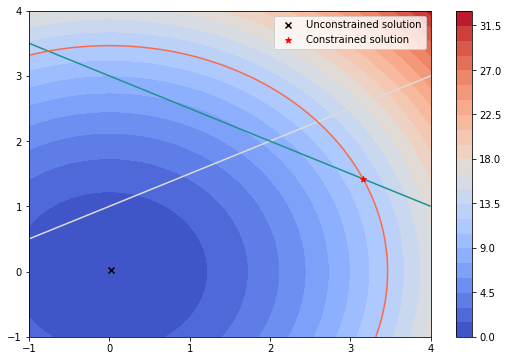

In [58]:
# plotting
plt.figure(figsize = [9, 6])

#objective function
plt.contourf(x1s, x2s, yvals, cmap='coolwarm', levels=30)
plt.colorbar()

#constrains
plt.contour(x1s, x2s, con1_vals, cmap='coolwarm', levels=[-100, 0, 100])
plt.contour(x1s, x2s, con2_vals, levels=[-100, 0, 100])
plt.contour(x1s, x2s, con3_vals, cmap='Reds', levels=[-100, 0, 100])

#solutions
plt.scatter(x1[argmin], x2[argmin], c='k', marker='x', zorder=2, label="Unconstrained solution")
plt.scatter(res.x[0], res.x[1], c='r', marker='*', zorder=2, label="Constrained solution")

#formatting
plt.legend()
plt.show()